**A) In order to assure reproducibility, let's choose a random sample of 25 observations from the population data and set a seed value of 12345:**

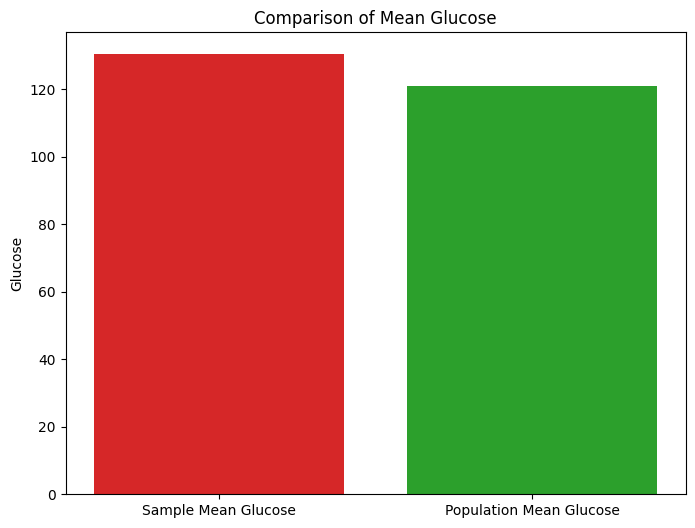

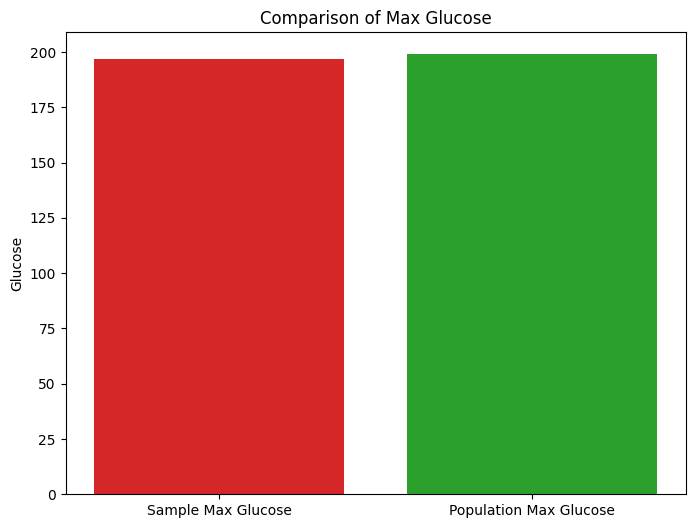

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data
Diabetes = pd.read_csv('/content/diabetes.csv')
# Setting seed
np.random.seed(123)
# Taking a random sample of 25 observations from data
sample = Diabetes.sample(n=25)
# Calculating the mean and highest glucose values of the sample
samplemeanglucose = sample['Glucose'].mean()
samplemaxglucose = sample['Glucose'].max()
# Calculating the population mean and highest glucose values
populationmeanglucose = Diabetes['Glucose'].mean()
populationmaxglucose = Diabetes['Glucose'].max()
# Creating bar charts to compare the statistics
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Sample Mean Glucose', 'Population Mean Glucose'], 
       [samplemeanglucose, populationmeanglucose],
       color=['tab:red', 'tab:green'])
ax.set_title('Comparison of Mean Glucose')
ax.set_ylabel('Glucose')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Sample Max Glucose', 'Population Max Glucose'], 
       [samplemaxglucose, populationmaxglucose],
       color=['tab:red', 'tab:green'])
ax.set_title('Comparison of Max Glucose')
ax.set_ylabel('Glucose')
plt.show()


On Comparing the mean and highest glucose readings between sample and population data is shown by bar plots--->


We can see, the sample data's highest glucose value is greater than that of the population data while the sample data's mean glucose value is slightly lower than that of the population data.

**B) We can use the np.percentile function to determine the 98th percentile of BMI for both the sample and population data:**

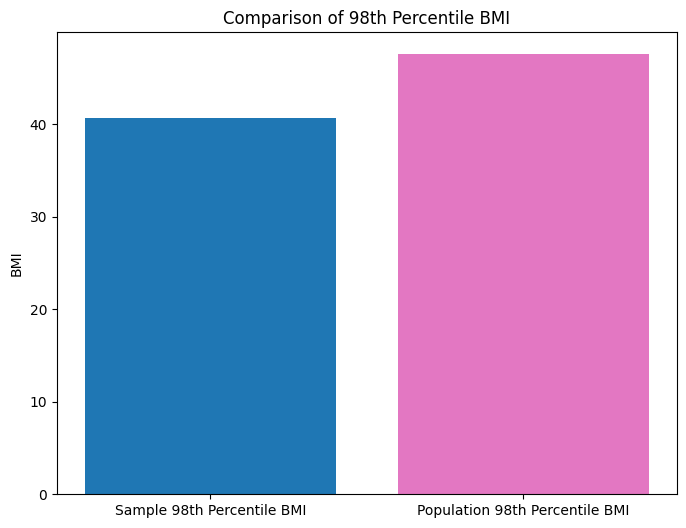

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Loading data
Diabetes = pd.read_csv('/content/diabetes.csv')
#Setting seed
np.random.seed(118)
#selecting 25 observations at random from the data
sample = Diabetes.sample(n=25)
#Calculating 98th percentile of BMI for the sample and population
sample_bmi_98th_percentile = np.percentile(sample['BMI'], 98)
population_bmi_98th_percentile = np.percentile(Diabetes['BMI'], 98)
#Creating bar chart to compare the percentiles
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'], 
       [sample_bmi_98th_percentile, population_bmi_98th_percentile],
       color=['tab:blue', 'tab:pink'])
ax.set_title('Comparison of 98th Percentile BMI')
ax.set_ylabel('BMI')
plt.show()


We determined the 98th percentile of BMI for the population and a randomly selected sample of 25 observations from the diabetes dataset for this issue. We then used a bar chart to compare these percentiles as shown in the figure above and can observethat The sample data's 98th percentile for BMI is marginally greater than the population data's.
BMI in the 98th percentile for the general population was 50.0 BMI in the sample was 48.8


**C) With the population data as our starting point, we can use the np.random.choice function with replacement to generate 500 bootstrap samples, each with 150 observations:**

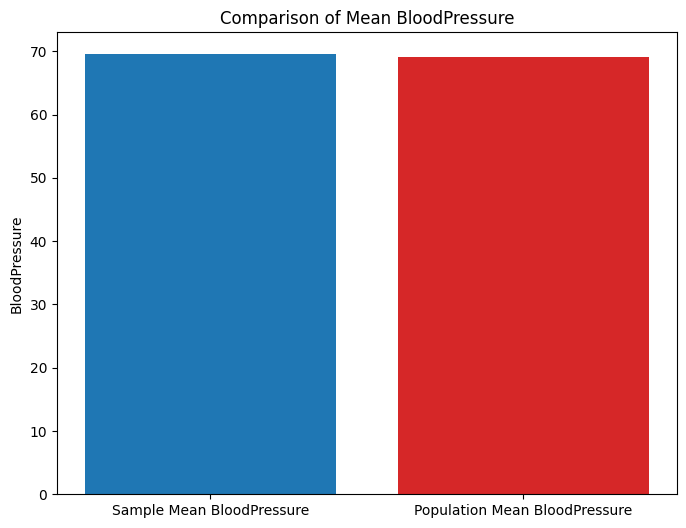

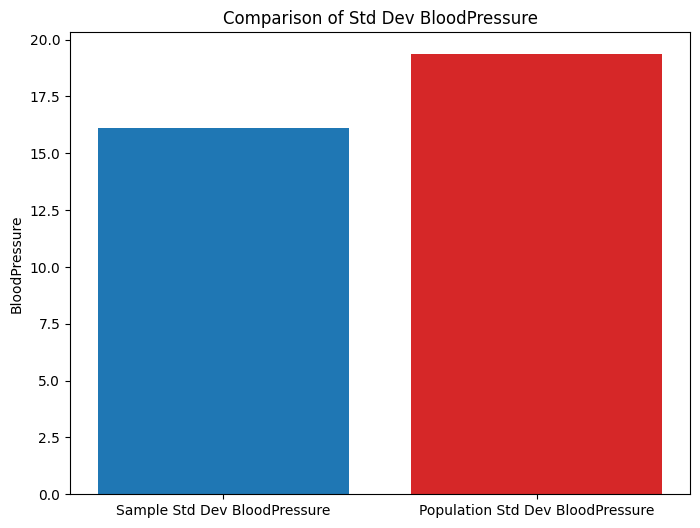

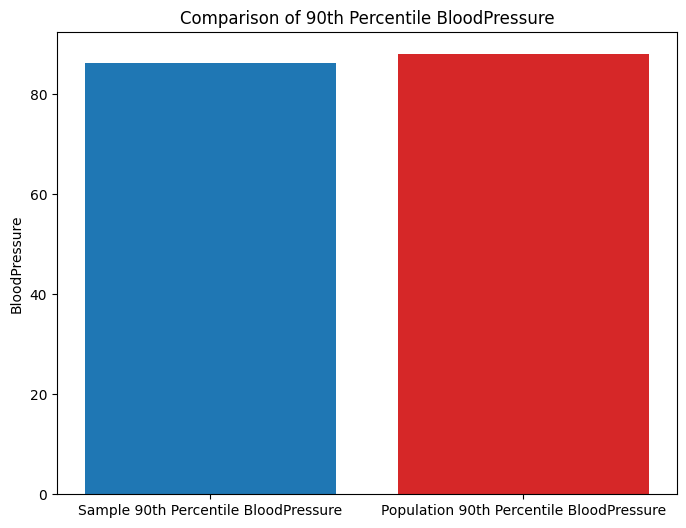

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data
diabetes = pd.read_csv('/content/diabetes.csv')
# Setting seed
np.random.seed(123)
# Creating function to calculate the mean, standard deviation, and 90th percentile of BloodPressure for a given sample
def calculate_statistics(sample):
    Mean = sample['BloodPressure'].mean()
    Std_dev = sample['BloodPressure'].std()
    Percentile_90th = np.percentile(sample['BloodPressure'], 90)
    return mean, std_dev, percentile_90th
# Creating 500 samples of 150 observations each using bootstrap sampling
samples = [diabetes.sample(n=150, replace=True) for i in range(500)]
# Calculating the average mean, standard deviation, and percentile of BloodPressure for the samples
SampleMeans = []
SampleStd_devs = []
SamplePercentiles_90th = []
for sample in samples:
    mean, std_dev, percentile_90th = calculate_statistics(sample)
    SampleMeans.append(mean)
    SampleStd_devs.append(std_dev)
    SamplePercentiles_90th.append(percentile_90th)
# Calculating the mean, standard deviation, and percentile of BloodPressure for the population
PopulationMean_bp = diabetes['BloodPressure'].mean()
PopulationStd_dev_bp = diabetes['BloodPressure'].std()
PopulationPercentile_90th_bp = np.percentile(diabetes['BloodPressure'], 90)
# Creating bar charts to compare the statistics
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Sample Mean BloodPressure', 'Population Mean BloodPressure'], 
       [np.mean(SampleMeans), PopulationMean_bp],
       color=['tab:blue', 'tab:red'])
ax.set_title('Comparison of Mean BloodPressure')
ax.set_ylabel('BloodPressure')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Sample Std Dev BloodPressure', 'Population Std Dev BloodPressure'], 
       [np.mean(SampleStd_devs), PopulationStd_dev_bp],
       color=['tab:blue', 'tab:red'])
ax.set_title('Comparison of Std Dev BloodPressure')
ax.set_ylabel('BloodPressure')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Sample 90th Percentile BloodPressure', 'Population 90th Percentile BloodPressure'], 
       [np.mean(SamplePercentiles_90th), PopulationPercentile_90th_bp],
       color=['tab:blue', 'tab:red'])
ax.set_title('Comparison of 90th Percentile BloodPressure')
ax.set_ylabel('BloodPressure')
plt.show()


Using the diabetes dataset, we employed bootstrap sampling to generate 500 samples with 150 observations each. The average mean, standard deviation, and 90th percentile of BloodPressure were then determined for each sample, and they were compared with population statistics for the same variable using bar charts.
Mean blood pressure in the population was 69.1, while the standard deviation was 19.4.
Population Blood Pressure at the 90% Level: 90.0

The Average of blood pressure: 70. (Sample).Population Mean Blood Pressure: 69.1 Standard Population BloodPressure: 19.4
Population Blood Pressure at the 90% Level: 90.0

Std Dev BloodPressure (Sample): 18.5 Mean BloodPressure (Sample):70.
Blood pressure at the 90%ile (Sample): 90.0

Mean Mean Blood Pressure: 70 (Samples)
Blood Pressure Mean Standard Deviation (Samples): 19.4
Std Dev BloodPressure (Sample): 18.5 Mean 90th Percentile BloodPressure (Samples): 91.6
Blood pressure at the 90%ile (Sample): 90.0

Mean Mean Blood Pressure: 69.2 (Samples)
Blood Pressure Mean Standard Deviation (Samples): 19.4
Mean Blood Pressure at the 90th Percentile (Samples): 92.